In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

Prepare the data. Load breast cancer data

In [75]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.target[0:20])
print(list(cancer.target_names))
print(cancer.data[0:5])
print(list(cancer.feature_names))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
['malignant', 'benign']
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 

# Problem 1. 
Break the data into training (80%)/testing data(20%). Estimate a tree classification model with maximum depth of 2. Plot the tree and calculate the accuracy rate. Predict target using all features, don't forget to set random numbers to 42. 

In [76]:
# Starting point
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
X = cancer.data 
y = cancer.target
random.seed(42)
import os     
os.environ["PATH"] += os.pathsep + '/usr/local/Cellar/graphviz/bin/'

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

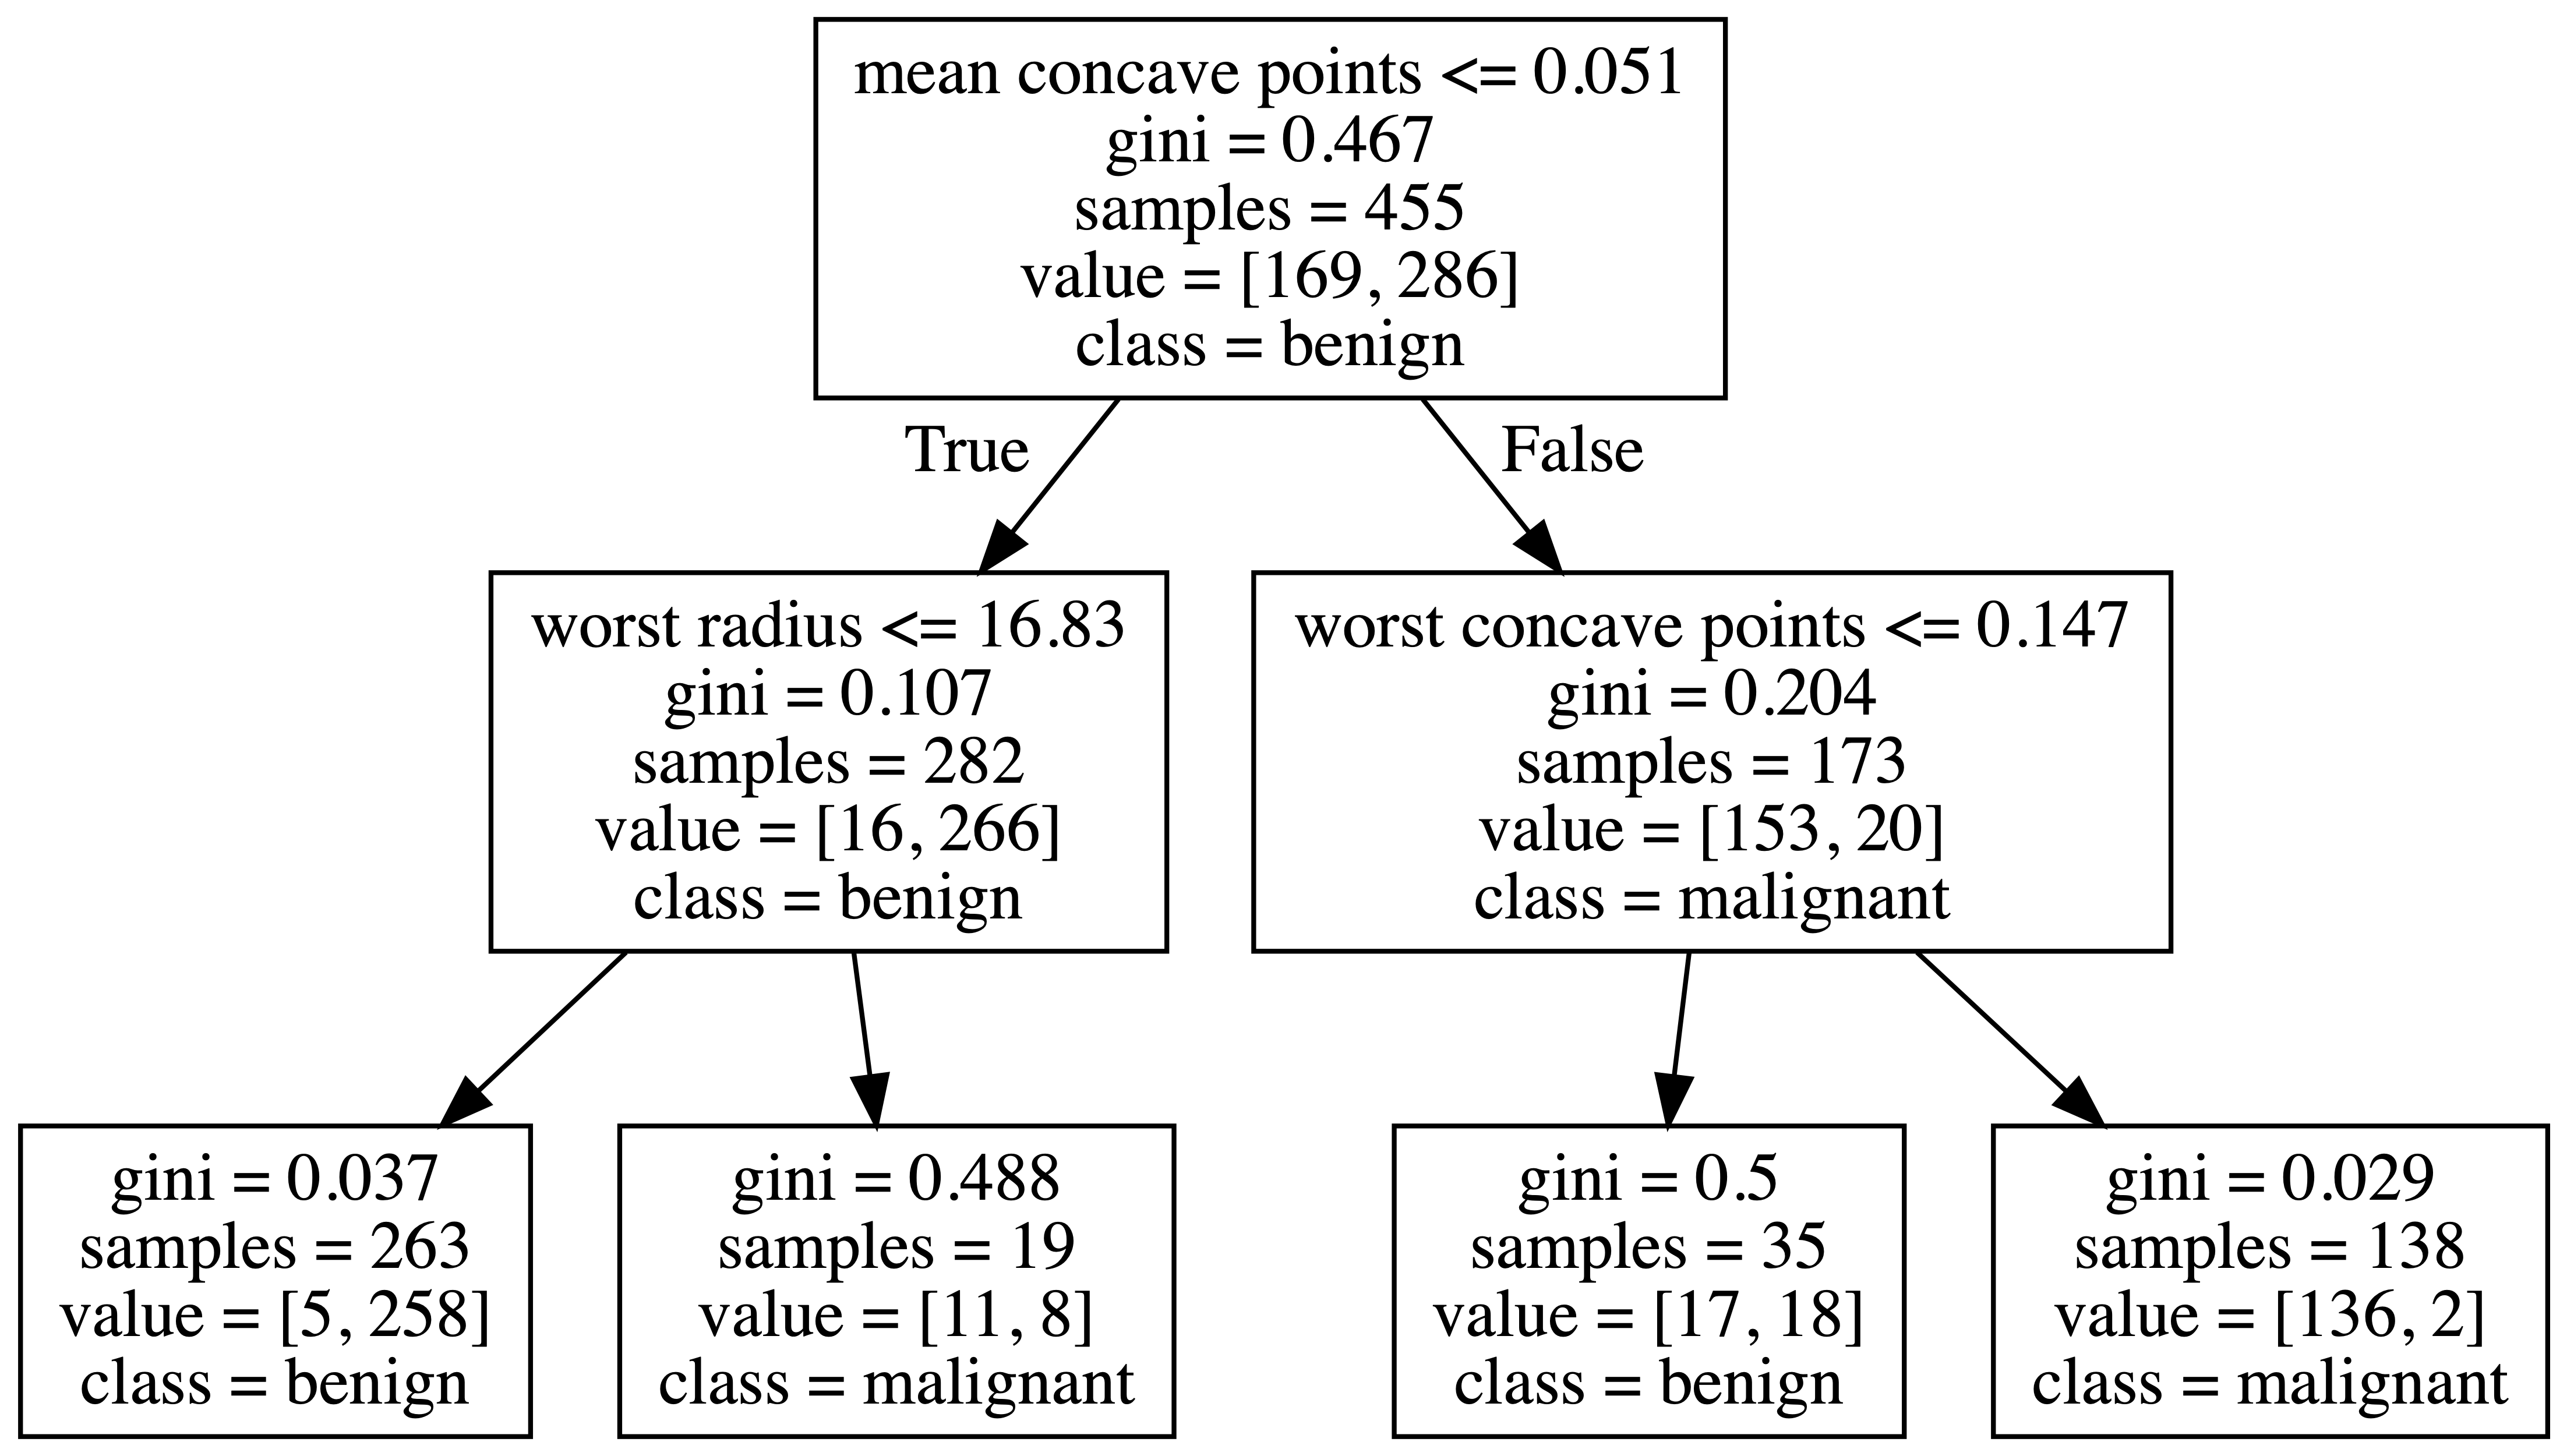

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

dot_data = tree.export_graphviz(tree_clf, out_file='tree.dot', 
                                feature_names=cancer.feature_names,  
                                class_names=cancer.target_names)
from subprocess import call
call(['dot', '-Tpng','tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree.png')

In [6]:
from sklearn.metrics import accuracy_score
y_pred = tree_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9298245614035088

Problem 2: 
Estimate an unrestricted tree using full data (training + testing). Find two most important features and create a scatter plot of malignant and benign tumors along the two axes of two most important feature. Hint: For example of a graph look at:
https://stackoverflow.com/questions/12487060/matplotlib-color-according-to-class-labels
Do you think the data need rotation?

In [85]:
tree_clf_1 = DecisionTreeClassifier(random_state=42)
tree_clf_1.fit(X, y)
tree_clf_1.fit(cancer["data"], cancer["target"])
for name, score in zip(cancer["feature_names"], tree_clf_1.feature_importances_):
    print(name, score)
# the most important features are worst radius and worst concave points

mean radius 0.0
mean texture 0.011277152370382114
mean perimeter 0.0
mean area 0.0
mean smoothness 0.005638576185191057
mean compactness 0.012530169300424571
mean concavity 0.0
mean concave points 0.0087711185102972
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.0
texture error 0.0
perimeter error 0.0
area error 0.00936121243059898
smoothness error 0.0010038401246787547
compactness error 0.0
concavity error 0.03184137139872597
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.6955935182252059
worst texture 0.08372821940254928
worst perimeter 0.0
worst area 0.011085902417901953
worst smoothness 0.01440487734312915
worst compactness 0.0
worst concavity 0.007667163522737443
worst concave points 0.10709687876817764
worst symmetry 0.0
worst fractal dimension 0.0


In [86]:
from sklearn.metrics import mean_squared_error
y_pred_0 = tree_clf_1.predict(X)
mean_squared_error(y,y_pred_0)

0.0

Text(0,0.5,'worst concave points')

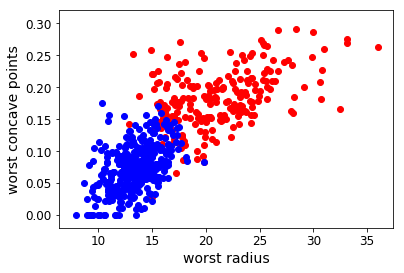

In [87]:
import matplotlib.pyplot as plt
plt.scatter(X[y==0, 20], X[y==0, 27],c='red')
plt.scatter(X[y==1, 20], X[y==1, 27],c='blue')
plt.xlabel(cancer.feature_names[20])
plt.ylabel(cancer.feature_names[27])

# Problem 3
Find approximately optimal rotation angle of the two most important features. Rotate them. Plot in in the scatter plot. Hint angle is measure in Pi's use fractions.

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[:,20].reshape(-1, 1))
a = scaler.transform(X[:,20].reshape(-1, 1))
scaler.fit(X[:,27].reshape(-1, 1))
b = scaler.transform(X[:,27].reshape(-1, 1))
X1 = np.c_[a, b]
#The criterion to satisfy for providing the new shape is that 'The new shape should be
# compatible with the original shape"

In [11]:
from sklearn.metrics import mean_squared_error
# Rotiation angle
mse=[]
acc=[]
for i in range(360*180):
    angle = np.pi / (i+1)
# Create rotaton matrix 2x2 for each point on a 2-dimensional plane
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
# Multiply x-data by the rotation matrix to shift the points
    Xr = X1.dot(rotation_matrix)
# Estimate a new tree
    tree_clf_r = DecisionTreeClassifier(random_state=42)
    tree_clf_r.fit(Xr, y)
    y_pred = tree_clf_r.predict(Xr)
    mse.append(mean_squared_error(y,y_pred))
    acc.append(accuracy_score(y, y_pred))

In [12]:
mse.index(min(mse)) # the optimal rotation angle is i=0,which means we donnot have to rotate.

0

In [64]:
acc.index(max(acc))

0

In [89]:
angle = np.pi / 180*45
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X1.dot(rotation_matrix)
tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

Text(0,0.5,'worst concave points')

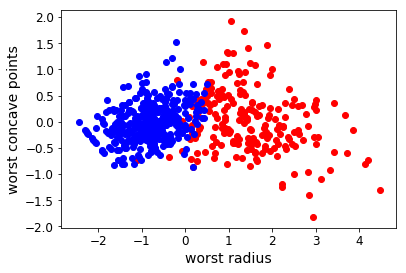

In [90]:
plt.scatter(Xr[y==0, 0], Xr[y==0, 1],c='red')
plt.scatter(Xr[y==1, 0], Xr[y==1, 1],c='blue')
plt.xlabel(cancer.feature_names[20])
plt.ylabel(cancer.feature_names[27])

 # Problem 4
In the main data drop variables used in the problem 3. Add instead the rotated variables (substitution). 
Estimate accuracy score using with a tree classifier with max depth = 2 (Same as in problem 1). How much did we gain from rotation?

In [91]:
X2 = np.delete(X, [20, 27], axis=1)
X_new = np.append(X2, Xr, axis=1)
X_new_train, X_new_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
tree_clf_2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_2.fit(X_new_train, y_train)
y_pred2 = tree_clf_2.predict(X_new_test)
accuracy_score(y_test, y_pred2)

0.9385964912280702

In [ ]:
# a slightly higher result

# Problem 5
Generate samples of 100, 10,000 and 100,000, moons using the code below. Set random seed at 42. Split data in training and testing sets. Estimate separately Logistic, Random Forest, SVC and the hard voting classifier. What happens to the accuracy score as you increase the number of observations?  I want you also to "feel" the slowness of SVM even with moderate data. 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
# n=100
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='hard')
voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.96
RandomForestClassifier 0.88
SVC 0.92
VotingClassifier 0.96


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [23]:
# n=10,000
X, y = make_moons(n_samples=10000, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='hard')
voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8588
RandomForestClassifier 0.9064
SVC 0.9196
VotingClassifier 0.9172


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [24]:
# n=100,000
X, y = make_moons(n_samples=100000, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='hard')
voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.85392
RandomForestClassifier 0.9
SVC 0.91404
VotingClassifier 0.9092


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
# the accuracy socre is decreassing 

# Problem 6
Generate data using the code provided below. Using testing accuracy as metric, estimate bagging random trees estimator with 200 estimators. Try different numbers of samples: 10, 100, 300, and 1000. What is optimal number of samples to be used? <br>
BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=200,
    max_samples= ?, bootstrap=True, n_jobs=-1, random_state=42)

In [25]:
X, y = make_moons(n_samples=2000, noise=0.40, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
from sklearn.ensemble import BaggingClassifier
pas_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=200,
    max_samples=10, bootstrap=True, n_jobs=-1, random_state=42)
pas_clf.fit(X_train, y_train)
y_pred = pas_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.818


In [27]:
pas_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=200,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
pas_clf.fit(X_train, y_train)
y_pred = pas_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.852


In [28]:
pas_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=200,
    max_samples=300, bootstrap=True, n_jobs=-1, random_state=42)
pas_clf.fit(X_train, y_train)
y_pred = pas_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.85


In [29]:
pas_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=200,
    max_samples=1000, bootstrap=True, n_jobs=-1, random_state=42)
pas_clf.fit(X_train, y_train)
y_pred = pas_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.832


In [ ]:
# 100 as the max_sample is the best choice

# Problem 7
Use data from the last problem. Find optimal learning rate, number of estimators and maximum depth using GradientBoostingRegressor,and Randomize grid search. Set a grid: number of estimators from 1 to 10, and maximum depth from 1 to 10. Set learning_rate = 0.1. Try 100 iterations. Example for randomizeSearch:

rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=?, cv=5, scoring='neg_mean_squared_error', random_state=42)
gbrt = GradientBoostingClassifier(max_depth=?, n_estimators=?, learning_rate = 0.1, random_state=42)  

Which estimator was the best? What was the accuracy of the best estimator?


In [66]:
X, y = make_moons(n_samples=2000, noise=0.40, random_state=42)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Set the range of parameters
param_distribs = {
        'n_estimators': randint(low=1, high=10),
        'max_depth': randint(low=1, high=10),
    }

gbrt = GradientBoostingClassifier(learning_rate = 0.1,random_state=42)

rnd_search = RandomizedSearchCV(gbrt, param_distributions=param_distribs,
                                n_iter=100, cv=5, scoring='neg_mean_squared_error')

rnd_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1684e8d0>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1684ec18>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [69]:
rnd_search.best_estimator_ # max_depth=4 and n_estimators=9

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=9, presort='auto',
              random_state=42, subsample=1.0, verbose=0, warm_start=False)

In [73]:
y_pred=rnd_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.8575

In [70]:
gbrt_reg = GradientBoostingClassifier(max_depth=4, n_estimators=9, learning_rate = 0.1, random_state=42)
gbrt_reg.fit(X_train,y_train)
y_pred=gbrt_reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.8575